In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

In [2]:
# df = pd.read_csv("sample_data/cleveland.data", delim_whitespace=True, encoding='utf-8', on_bad_lines='skip')
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv("processed.cleveland.data", names=column_names, na_values=["?"])
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


# ***Data Cleaning & Preprocessing***

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
df = pd.get_dummies(df, columns=['cp'], dummy_na=False)
df = pd.get_dummies(df, columns=['sex'], dummy_na=False)
df = pd.get_dummies(df, columns=['fbs'], dummy_na=False)
df = pd.get_dummies(df, columns=['exang'], dummy_na=False)
df = pd.get_dummies(df, columns=['restecg'], dummy_na=False)
df = pd.get_dummies(df, columns=['slope'], dummy_na=False)
df = pd.get_dummies(df, columns=['ca'], dummy_na=False)
df = pd.get_dummies(df, columns=['thal'], dummy_na=False)

df.head()

,age,trestbps,chol,thalach,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [7]:
df['num'] = df.apply(lambda x: (1 if x['num']>0 else 0), axis=1)
df.head(10)

,age,trestbps,chol,thalach,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
5,56.0,120.0,236.0,178.0,0.8,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6,62.0,140.0,268.0,160.0,3.6,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
7,57.0,120.0,354.0,163.0,0.6,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
8,63.0,130.0,254.0,147.0,1.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
9,53.0,140.0,203.0,155.0,3.1,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1


# ***Data Analysis & Visualization***

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num,303.0,0.458746,0.499120,0.0,0.0,0.0,1.0,1.0
cp_1.0,303.0,0.075908,0.265288,0.0,0.0,0.0,0.0,1.0
cp_2.0,303.0,0.165017,0.371809,0.0,0.0,0.0,0.0,1.0
cp_3.0,303.0,0.283828,0.451600,0.0,0.0,0.0,1.0,1.0
cp_4.0,303.0,0.475248,0.500213,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:xlabel='num', ylabel='count'>

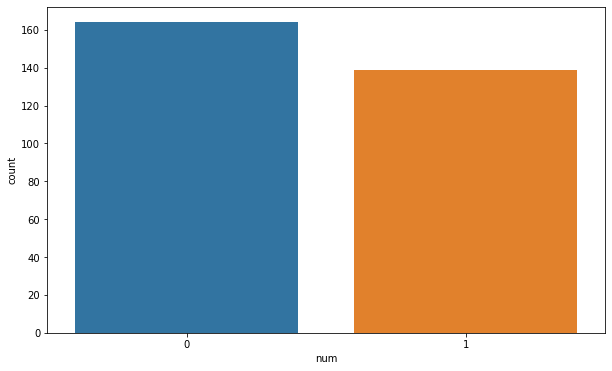

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='num', data=df)

<AxesSubplot:>

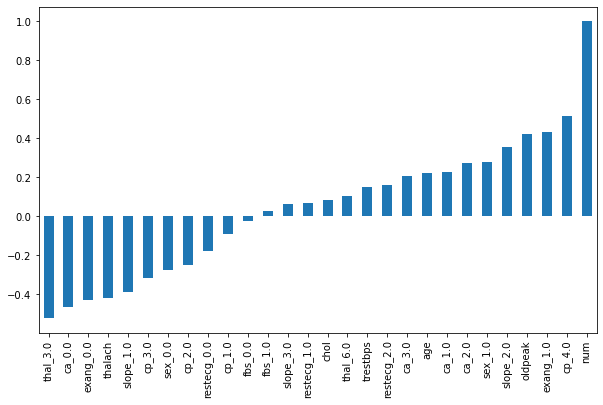

In [10]:
plt.figure(figsize=(10, 6))
df.corr()['num'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

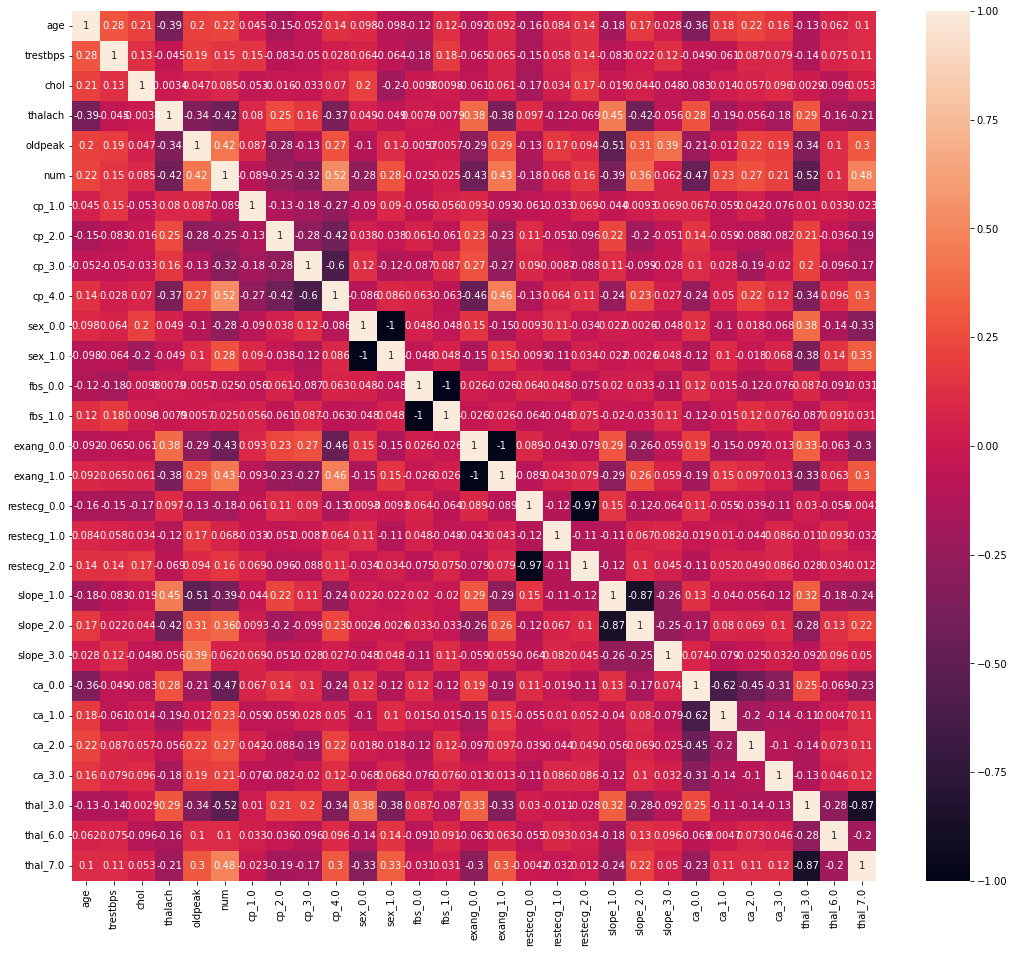

In [11]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True)

In [12]:
df.to_csv('updated_cleveland2.csv', index=False)

In [13]:
X = df.drop('num', axis=1).values
Y = df['num'].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=150)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train.shape, y_train.shape

((212, 28), (212,))

In [17]:
x_test.shape, y_test.shape

((91, 28), (91,))

# ***Model Building***

## ***SVM Model***

In [18]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [19]:
svm_predict = model.predict(x_test)

## ***ANN Model***

In [20]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(120,120,120), activation='relu', solver='adam', max_iter=400, early_stopping=True, random_state=101)

In [21]:
classifier.fit(x_train, y_train)
ann_predict = classifier.predict(x_test)

# ***Matrix Evaluation***

In [22]:
svm_cm = confusion_matrix(y_test, svm_predict)
svm_acc = accuracy_score(y_test, svm_predict)
svm_prec = precision_score(y_test, svm_predict)
svm_rec = recall_score(y_test, svm_predict)

ann_cm = confusion_matrix(y_test, ann_predict)
ann_acc = accuracy_score(y_test, ann_predict)
ann_prec = precision_score(y_test, ann_predict)
ann_rec = recall_score(y_test, ann_predict)

## ***Comparison Table***

In [23]:
print("SVM Accuracy:", svm_acc, "----------", "ANN Accuracy: ", ann_acc)
print("SVM Precision:",svm_prec,"----------", "ANN Precision: ",ann_prec)
print("SVM Recall:",   svm_rec, "----------", "ANN Recall: ", ann_rec)

SVM Accuracy: 0.8791208791208791 ---------- ANN Accuracy:  0.8901098901098901
SVM Precision: 0.8260869565217391 ---------- ANN Precision:  0.8780487804878049
SVM Recall: 0.926829268292683 ---------- ANN Recall:  0.8780487804878049


# ***Plotting Classification Accuracy***

<AxesSubplot:title={'center':'SVM'}>

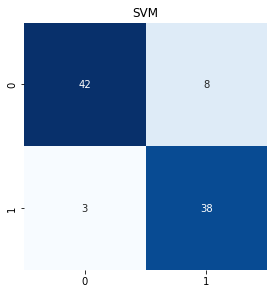

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
plt.title("SVM")
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

<AxesSubplot:title={'center':'ANN'}>

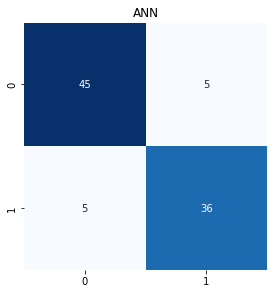

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 2)
plt.title("ANN")
sns.heatmap(ann_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

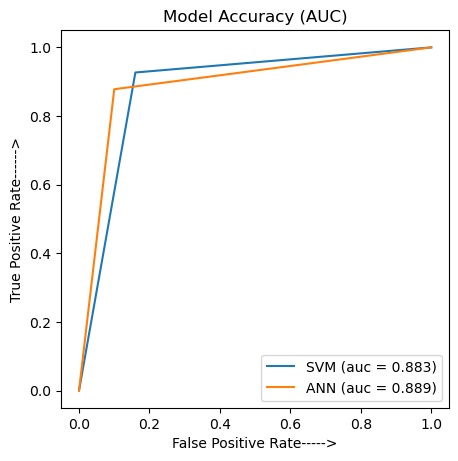

In [26]:
ann_fpr, ann_tpr, threshold = roc_curve(y_test, ann_predict)
auc_ann = auc(ann_fpr, ann_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_predict)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(ann_fpr, ann_tpr, linestyle='-', label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel("False Positive Rate----->")
plt.ylabel("True Positive Rate------>")

plt.title("Model Accuracy (AUC)")

plt.legend()
plt.show()

# ***Dimensionality Reduction with PCA***

In [27]:
def get_models():
	models = dict()
	for i in range(1,25):
		steps = [('pca', PCA(n_components=i)), ('m', SVC(kernel='linear'))]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [28]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.819 (0.076)
>2 0.811 (0.074)
>3 0.809 (0.070)
>4 0.795 (0.081)
>5 0.802 (0.078)
>6 0.797 (0.072)
>7 0.797 (0.081)
>8 0.794 (0.080)
>9 0.798 (0.072)
>10 0.805 (0.066)
>11 0.811 (0.067)
>12 0.800 (0.071)
>13 0.787 (0.067)
>14 0.778 (0.071)
>15 0.779 (0.065)
>16 0.787 (0.070)
>17 0.778 (0.076)
>18 0.780 (0.073)
>19 0.783 (0.073)
>20 0.775 (0.067)
>21 0.770 (0.070)
>22 0.766 (0.072)
>23 0.766 (0.072)
>24 0.766 (0.072)


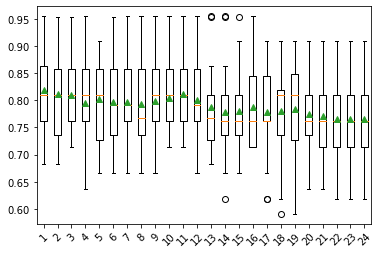

In [29]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [30]:
pca = PCA()
pca.fit(x_train)
pca.transform(x_train)

array([[-3.26468149e+00, -7.44867728e-01, -2.54684189e-03, ...,
        -2.22044605e-16, -1.11022302e-16,  2.22044605e-16],
       [ 5.50075067e-01,  1.67367731e+00,  2.28590606e+00, ...,
         5.55111512e-16, -4.44089210e-16, -3.33066907e-16],
       [ 5.22001032e-01,  1.45962443e+00, -2.66280432e+00, ...,
         9.99200722e-16, -2.22044605e-16, -3.33066907e-16],
       ...,
       [-3.40282395e+00, -1.46563602e+00, -6.66786260e-01, ...,
         0.00000000e+00, -5.55111512e-17,  1.11022302e-16],
       [ 2.06596623e+00,  4.54377084e-01, -1.97742393e+00, ...,
         6.10622664e-16, -6.66133815e-16, -3.74700271e-16],
       [-2.44508280e+00, -1.21715446e-01, -1.04101196e+00, ...,
         4.99600361e-16,  2.22044605e-16, -4.44089210e-16]])

C:\Users\myneee101\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


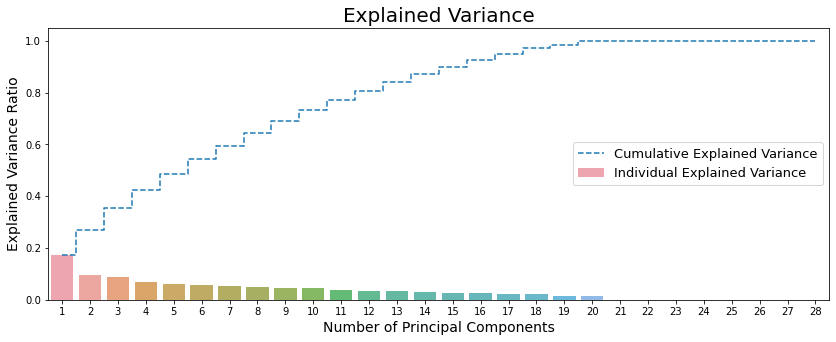

In [31]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(x_train.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
sns.barplot(np.arange(1, x_train.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85,
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);